In [149]:
import numpy as np
import handcalcs.render
import matplotlib.pyplot as plt
import warnings
from collections import Counter

dar KNN fasele ha bar asase chand algorithm mohasebe mishe ke yeki az oona fasele oghlidosi (euclidean distance) hast ke vaseye 2bod formoolesh ine:


In [41]:
def euclidean_distance(x: np.array, y: np.array):
    # return np.math.sqrt( sum( (y-x)**2 ) )  # this is my way to calculate euclidean distance. but it's better and faster to use np.linalg.norm
     return np.linalg.norm(x - y)
    

In [26]:
euclidean_distance(np.array([1,3]), np.array([2,5]))

2.23606797749979

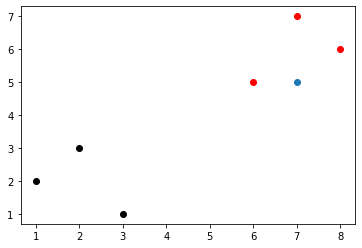

In [166]:
dataset = {"k": [[1,2], [2,3], [3,1]], 'r': [[6,5], [7, 7], [8, 6]]}  # 2 no target darim "r" va "k"

new_data = [7, 5]
# rasm bokonim mishe in
for target in dataset:
    for data in dataset[target]:
        plt.scatter(data[0], data[1], c=target)

plt.scatter(new_data[0], new_data[1]) # -> in data bayad joze kodoom daste (target) bashe?
plt.show()


In [185]:
class KNN:
    """KNN Classification only for 2D features Datasets"""
    def __init__(self, k=3, algorithm="euclidean"):
        self.k = k
        self.algorithm = algorithm
        self.data_features = None
    
    def fit(self, data, target):
        if len(set(target)) > self.k:
            print(len(data))
            warnings.warn("no haye target hat az K hat bishtare")
        if len(data[0]) != len(target):
            raise Exception("tedade data ha ba target ha yeksan nist")
        new_data = {}
        new_features = np.array(list(zip(data[0], data[1])))
        for i, k in enumerate(target):
            if k in new_data: 
                new_data[k].append(new_features[i])
            else:
                new_data[k] = [new_features[i]]
        self.data_features = new_data
        
    def predict(self, new_feature):
        distances = []
        for group in self.data_features:
            for feature in self.data_features[group]:
                distances.append([euclidean_distance(feature, new_feature), group])

                
        return Counter([i[1] for i in sorted(distances)[:self.k]]).most_common(1)[0][0]

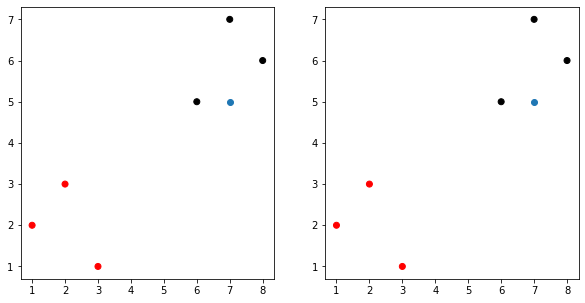

In [187]:
x_train = np.array([[1,2, 3, 6, 7, 8], [2, 3, 1, 5, 7, 6]])
y_train = np.array(["r", "r", "r", "k", "k", "k"])

knn = KNN()
new_data = [7, 5]
# az rooye nemoodar mifahmim ke new_data bayad joze dasteye "K" bashe

knn.fit(x_train, y_train)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(x_train[0], x_train[1], c=y_train)
plt.scatter(new_data[0], new_data[1])
plt.subplot(1, 2, 2)
plt.scatter(x_train[0], x_train[1], c=y_train)
plt.scatter(new_data[0], new_data[1], c=knn.fit(x_train, y_train))
plt.show()




In [188]:
# we made it

None


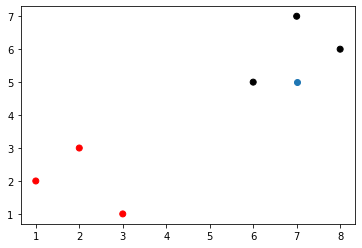

In [189]:
plt.scatter(x_train[0], x_train[1], c=y_train)
plt.scatter(new_data[0], new_data[1], c=knn.fit(x_train, y_train))
print(knn.fit(x_train, y_train))